# Ch-17, Generating Capacity Reliability Evaluation

## example 17.1 Page 421

In [3]:
from math import factorial
#given
n=2 #number of generating station
f=0.03 #F.O.R
a=1-f
p=40 #generation station power 
g = range(0,3)
Pg = range(0,3) 
def comb(m,r):
    y = factorial(m)/(factorial(m-r)*factorial(r))
    return y
print "No. of Units out\t\tCapacity Out MW\t\tCapacity Available MW\t\tProbability"
for i in g:
    Pg[i] = comb(n,i)*f**i*a**(n-i)
    
    print i,'\t\t\t\t',p*i,'\t\t\t\t',p*(n-i),'\t\t\t',Pg[i]
    


No. of Units out		Capacity Out MW		Capacity Available MW		Probability
0 				0 				80 			0.9409
1 				40 				40 			0.0582
2 				80 				0 			0.0009


## example 17.2 Page: 422

In [4]:
from math import factorial
#given
n1=2 #number of generating station
f1=0.03 #F.O.R
a1=1-f1
p1=40 #genetaion station power
n2=1  #number of genreting station 
f2=0.03 #F.O.R for second set
a2=1-f2
p2=30 #generating station power in second set 
def comb(m,r):
    y=factorial(m)/(factorial(m-r)*factorial(r))
    return y
pg2=range(0,n2+1)
co2=range(0,n2+1)
ca2=range(0,n2+1)
print "Part(a):"
for i in range(0,n2+1):
    pg2[i]=comb(n2,i)*((f2)**i)*((a2)**(n2-i))
    co2[i]=p2*i ;ca2[i]=p2*(n2-i)
    print "\nnumber of units out %d ,capacity out  %dMW ,capacity available  %dMW ,probability %0.2f "%(i,co2[i],ca2[i],pg2[i])

pg1=range(0,n1)
co1=range(0,n1)
ca1=range(0,n1)
print "Part(b):"
print "\nfor exp 17 1 "
for i in range(0,n1):
    pg1[i]=comb(n1,i)*((f1)**i)*((a1)**(n1-i))
    co1[i]=p1*i ;ca1[i]=p1*(n1-i)
    print "\nnumber of units out %d ,capacity out  %dMW ,capacity available %dMW ,probability %4f "%(i,co1[i],ca1[i],pg1[i])

print "combination of 2 set of stations"
tp=1
pocg=0
for i in range(0,n1):
    
    for j in range(0,n2):
        og=co1[i]+co2[j] #now total system capacity out
        cg=ca1[i]+ca2[j]  #now total system capacity available
        tp=tp-pocg
        pocg=pg1[i]*pg2[j] #individual stste probability
        print "\ncapacity out %dMW ,capacity available %dMW ,individual state probability %.6f ,cumulative probability %.6f"%(og,cg,pocg,tp)
    


Part(a):

number of units out 0 ,capacity out  0MW ,capacity available  30MW ,probability 0.97 

number of units out 1 ,capacity out  30MW ,capacity available  0MW ,probability 0.03 
Part(b):

for exp 17 1 

number of units out 0 ,capacity out  0MW ,capacity available 80MW ,probability 0.940900 

number of units out 1 ,capacity out  40MW ,capacity available 40MW ,probability 0.058200 
combination of 2 set of stations

capacity out 0MW ,capacity available 110MW ,individual state probability 0.912673 ,cumulative probability 1.000000

capacity out 40MW ,capacity available 70MW ,individual state probability 0.056454 ,cumulative probability 0.087327


## example 17.3: Page 423


number of units out 0 ,capacity out 0MW ,capacity available 200MW ,probability 0.814506 

number of units out 1 ,capacity out 50MW ,capacity available 150MW ,probability 0.171475 

number of units out 2 ,capacity out 100MW ,capacity available 100MW ,probability 0.013538 

number of units out 3 ,capacity out 150MW ,capacity available 50MW ,probability 0.000475 


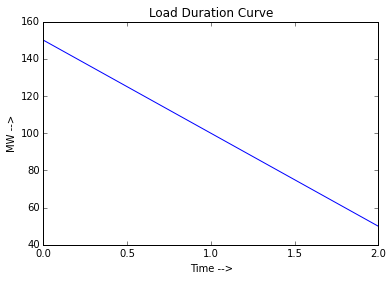


number of units out 0 ,capacity out 0MW ,capacity available 200MW ,probability 0.814506 ,tg in percentage 0.00 ,expected load 0.000000MW

number of units out 1 ,capacity out 50MW ,capacity available 150MW ,probability 0.171475 ,tg in percentage 0.00 ,expected load 0.000000MW

number of units out 2 ,capacity out 100MW ,capacity available 100MW ,probability 0.013538 ,tg in percentage 200.00 ,expected load 2.707500MW


expected loss of load is 2.707500MW percent of time. assuming 365 days in a year, then expected loss of load is 9.882MW days per year


In [5]:
from __future__ import division
from math import factorial
from numpy import arange
%matplotlib inline
from matplotlib import pyplot as plt
#given
n=4 #number of generating station
f=0.05 #F.O.R
a=1-f
p=50 #generation station power 
mp=150 #maximum alowable  power
lf=50 #load factor in percentage
def comb(m,r):
    y=factorial(m)/(factorial(m-r)*factorial(r))
    return y
pg = range(0,n)
co = range(0,n)
ca = range(0,n)
for i in range(0,n):
    pg[i]=comb(n,i)*((f)**i)*((a)**(n-i))
    co[i]=p*i ;ca[i]=p*(n-i)
    print "\nnumber of units out %d ,capacity out %dMW ,capacity available %dMW ,probability %4f "%(i,co[i],ca[i],pg[i])

ld=arange(mp,0,-lf)
#[m n]=size(ld)
n =len(ld)
plt.plot(ld)
plt.title('Load Duration Curve')
plt.xlabel('Time -->')
plt.ylabel('MW -->')
plt.show()
tg = range(0,n+1)
tg[n-2]=round(10000/(n-2))/100
tg[n-1]=tg[n-2]*2
tg[n]=100
tg[1]=0 ;tg[0]=0 #maximum load limit
el = range(0,n)
for i in range(0,n):
    el[i]=pg[i]*tg[i]
    print "\nnumber of units out %d ,capacity out %dMW ,capacity available %dMW ,probability %4f ,tg in percentage %.2f ,expected load %.6fMW"%(i,co[i],ca[i],pg[i],tg[i],el[i])

lt=sum(el)
print "\n\nexpected loss of load is %.6fMW percent of time. assuming 365 days in a year, then expected loss of load is %.3fMW days per year"%(lt,lt*365/100)

## example 17.4 Page 425


number of units out 0 ,capacity out 0MW ,capacity available 200MW ,probability 0.9223682 

number of units out 1 ,capacity out 50MW ,capacity available 150MW ,probability 0.0752954 

number of units out 2 ,capacity out 100MW ,capacity available 100MW ,probability 0.0023050 

number of units out 3 ,capacity out 150MW ,capacity available 50MW ,probability 0.0000314 


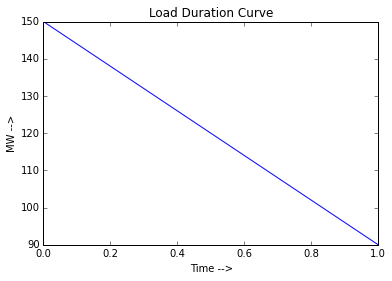



number of units out -1 ,capacity out 0MW ,capacity available 200MW ,probability 0.922368 ,tg in percentage 0.00 ,expected load 0.000000MW

number of units out 0 ,capacity out 50MW ,capacity available 150MW ,probability 0.075295 ,tg in percentage 0.00 ,expected load 0.000000MW

number of units out 1 ,capacity out 100MW ,capacity available 100MW ,probability 0.002305 ,tg in percentage 41.67 ,expected load 0.096040MW

number of units out 2 ,capacity out 150MW ,capacity available 50MW ,probability 0.000031 ,tg in percentage 83.33 ,expected load 0.002613MW


expected loss of load is 0.098653MW percent of time. assuming 365 days in a year, then expected loss of load is 0.360MW days per year ,some times the loss of load is also expressed as reciprocal of this figure and then the units are years per day this result is 2.7771MW years per day.


In [6]:
from math import factorial
from numpy import arange
%matplotlib inline
from matplotlib import pyplot as plt

#given
n=4 #number of generating station
f=0.02 #F.O.R
a=1-f
p=50 #generation station power 
mp=150 #maximum alowable  power
minp=30 #minimum power 
lf=60 #load factor in percentage
def comb(m,r):
    y=factorial(m)/(factorial(m-r)*factorial(r))
    return y

pg = range(0,n)
co = range(0,n)
ca = range(0,n)
for i in range(0,n):
    pg[i]=comb(n,i)*((f)**i)*((a)**(n-i))
    co[i]=p*i ;ca[i]=p*(n-i)
    print "\nnumber of units out %d ,capacity out %dMW ,capacity available %dMW ,probability %.7f "%(i,co[i],ca[i],pg[i])


ld=arange(mp,minp,-lf)
#[m n1]=size(ld)
n1=len(ld)
#[mm m]=max(co)
m=max(co)

plt.plot(ld)
plt.title('Load Duration Curve')
plt.xlabel('Time -->')
plt.ylabel('MW -->')
plt.show()

tg = range(0,n)
tg[0]=0
for i in range(1,n):
    
    tg[i]=(mp-ca[i])*100/(2*lf) #percentage time 

print ""
el = range(0,n)
for i in range(0,n):
    el[i]=pg[i]*tg[i]
    print "\nnumber of units out %d ,capacity out %dMW ,capacity available %dMW ,probability %4f ,tg in percentage %.2f ,expected load %.6fMW"%(i-1,co[i],ca[i],pg[i],tg[i],el[i])

lt=sum(el)
print "\n\nexpected loss of load is %.6fMW percent of time. assuming 365 days in a year, then expected loss of load is %.3fMW days per year ,some times the loss of load is also expressed as reciprocal of this figure and then the units are years per day this result is %.4fMW years per day."%(lt,lt*365/100,100/(lt*365))